# Tâche 8

##  Téléchargement la structure de bandes électroniques du TiGePt

In [25]:
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("OrxTdTdienuaKM79RmZ") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1008680")
    bandes = m.get_bandstructure_by_material_id("mp-1008680")
    

## Données sur la bande interdite

On va chercher à savoir la valeur de l'énergie de la bande, savoir si elle est directe (True) ou non (False) et ainsi obtenir des informations sur les étiquettes des points k de la transition. Par la suite, cela va nous permettre de représenter cette bande d'énergie.
On va retenir seulement les valeurs uniques des données sur les distances récupérées.

In [30]:
#On cherche la bande correspondante
import pymatgen.electronic_structure
from pymatgen.electronic_structure.bandstructure import*
from pymatgen.electronic_structure.plotter import BSPlotter

bandesbis = bandes.get_band_gap()
print("L'énergie de la bande interdite vaut : ", bandesbis["energy"])
print("Bande directe ? : ", bandesbis["direct"])
print("Etiquettes des points k de la transition : ", bandesbis["transition"])


L'énergie de la bande interdite vaut :  0.8809000000000005
Bande directe ? :  False
Etiquettes des points k de la transition :  \Gamma-X


### Représentation graphique 

Le point rouge correspond au minimum de la dernière bande de valence et le point vert le maximum de la première bande de conduciton

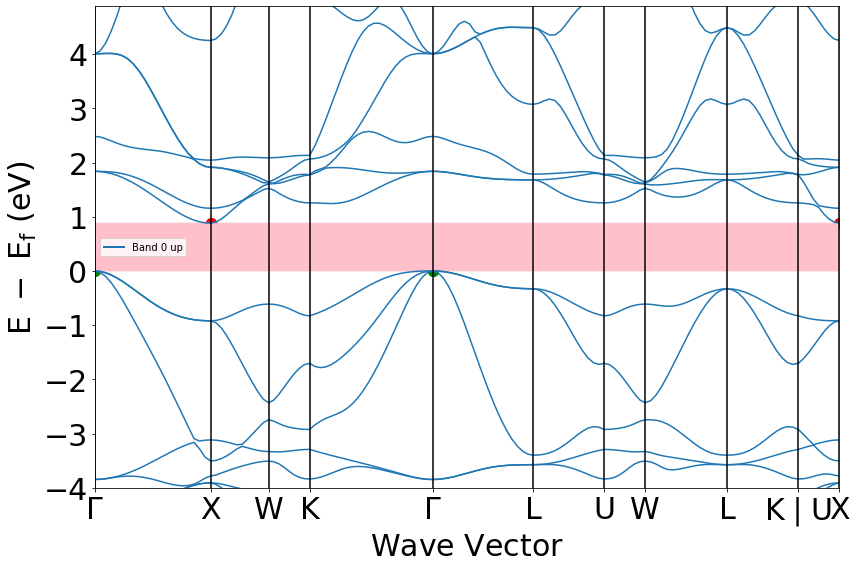

In [40]:
#On obtient le graphique : 
graph = BSPlotter(bandes)
graph.get_plot(vbm_cbm_marker = True)
data = graph.bs_plot_data()
dist = data.get("ticks").get("distance")
bandint = bandes.get_band_gap()

#on constate qu'il y a des valeurs identiques dans dist, on crée alors un array similaire en conservant les valeurs uniques
import numpy as np
newdist = [dist[0], dist[1], dist[3], dist[5], dist[7],dist[9],dist[11], dist[13], dist[15],dist[17], dist[18]]

d0 = newdist[1]-newdist[0]
d1 = newdist[2]-newdist[1]
d2 = newdist[3]-newdist[2]
d3 = newdist[4]-newdist[3]
d4 = newdist[5]-newdist[4]
d5 = newdist[6]-newdist[5]
d6 = newdist[7]-newdist[6]
d7 = newdist[8]-newdist[7]
d8 = newdist[9]-newdist[8]
d9 = newdist[10]-newdist[9]

d = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]

#Bande interdite 
plt.fill_between(np.linspace(-1, 7, 1000), 0, bandint.get('energy'), color = "pink")


#### Calcul des pentes 
Recherche des différentes pentes à partir du rapport des énergies sur les distances : 


In [41]:
energie = data.get('energy')

# Valence Band Maximums (VBM)
VBM = bandes.get_vbm()

# Conduction Band Minimums (CBM) 
CBM = bandes.get_cbm()

#print("Index vbm :" , VBM['band_index'])
#print("Index cbm :" , CBM['band_index'])

energc = np.zeros(9)
energv = np.zeros(9)
pentec = np.zeros(9)
pentev = np.zeros(9)

for i in range(9):
    energv[i] =energie.get('1')[i][16][-1] - energie.get('1')[i][16][0]
    energc[i] =energie.get('1')[i][17][-1] - energie.get('1')[i][17][0]

    
for i in range (9):
    pentec[i] = energc[i]/d[i]
    pentev[i] = energv[i]/d[i] 


#on calcule les minimums et les maximums pour les bandes de valence et conduction
maxV = np.max(abs(pentev)) #d0
maxC = np.max(abs(pentec)) #d1
minC = np.min(abs(pentec)) #d4
minV = np.min(abs(pentev)) #d4


#### Représentation graphique avec flèches représentatives
On insère nos flèches dans notre graphe

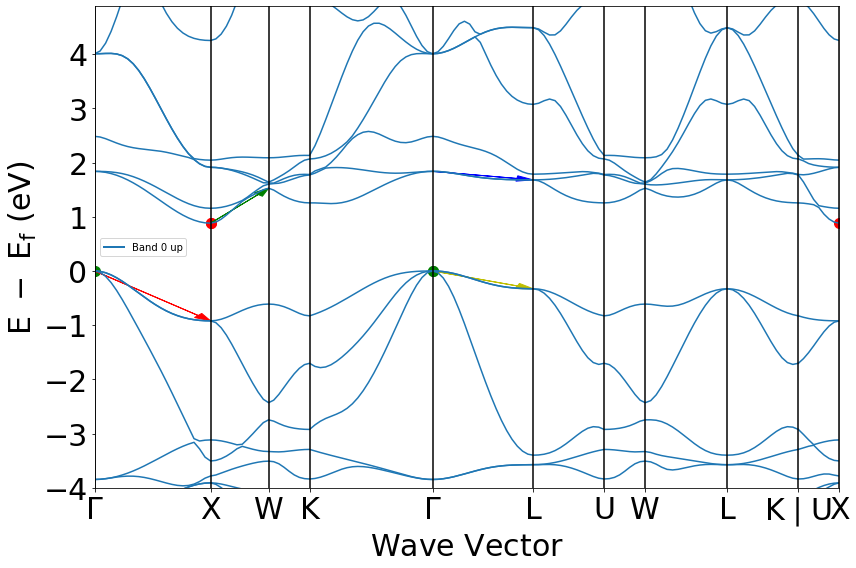

In [43]:

graph.get_plot(vbm_cbm_marker = True)
#pour le plot 
import matplotlib.pyplot as plt

plt.arrow(newdist[0], (energie.get('1')[0][16])[0], d[0], energv[0], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(newdist[1], (energie.get('1')[1][17])[0], d[1], energc[1], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(newdist[4], (energie.get('1')[4][17])[0], d[4], energc[4], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(newdist[4], (energie.get('1')[4][16])[0], d[4], energv[4], color = 'y', head_width = 0.1,length_includes_head=True)

## Recherche de la masse effective

On fait l'hypothèse d'une disperstion parabolique de l'énergie. On réalise donc une interpolation pour obtenir l'expression de l'énergie donc on obtiendra finalement la dérivée seconde (voir image suivante).


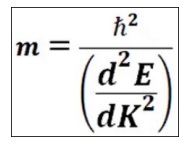

In [44]:
import matplotlib.image as masse_picture
import numpy as np

masse_picture=masse_picture.imread('masse effective.png')
fig, axes = plt.subplots(figsize=(3,3))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(masse_picture)
plt.show()

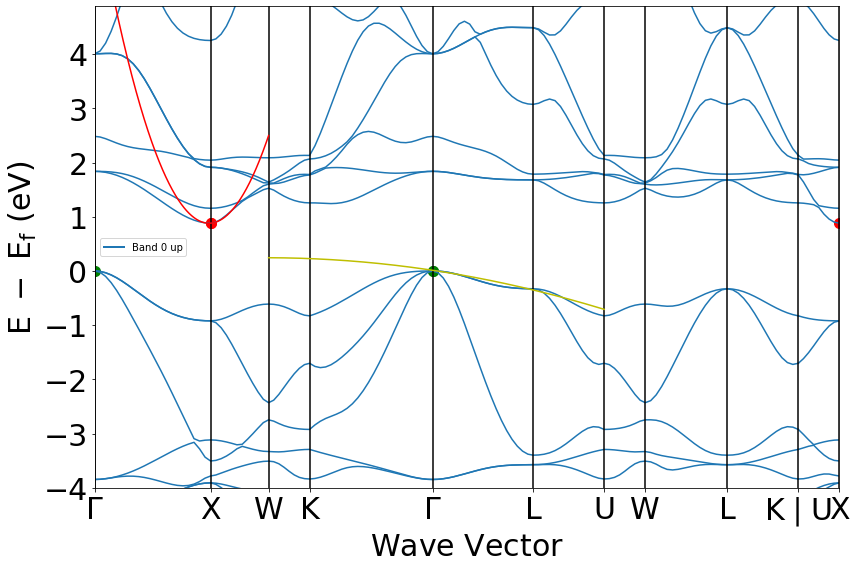

In [48]:
hbar = (6.62607015*10**(-34))/(2*np.pi*1.602176634*10**(-19)) #en eV 

#on récupère nos données
vbms = data.get('vbm')
cbms = data.get('cbm')

#on va générer nos paraboles à partir des sommets des bandes de valence et des bandes de conduction
E = np.zeros(3)
K = np.zeros(3)

Ebis = np.zeros(3)
Kbis = np.zeros(3)

#pour la bande de valence
K[0] = data.get('distances')[4][-2]
K[1] = vbms[0][0]
K[2] = data.get("distances")[4][1]
E[0] = data.get('energy').get("1")[4][16][-2]
E[1] = vbms[0][1]
E[2] = data.get("energy").get("1")[4][16][1]

#pour la bande de conduction
Kbis[0] = data.get('distances')[0][-2]
Kbis[1] = cbms[0][0]
Kbis[2] = data.get("distances")[1][1]
Ebis[0] = data.get('energy').get("1")[0][17][-2]
Ebis[1] = cbms[0][1]
Ebis[2] = data.get("energy").get("1")[1][17][1]

#Représentation des paraboles
graph.get_plot(vbm_cbm_marker = True)
#pour la bande de valence 
para_val = np.polyfit(K, E, 2) 
absval = np.linspace(data.get("distances")[2][0],data.get("distances")[5][-1],1000)
plt.plot(absval,np.polyval(para_val,absval),'y')

#pour la bande de conduction
para_cond = np.polyfit(Kbis, Ebis, 2)
abscond = np.linspace(data.get("distances")[0][0],data.get("distances")[1][-1],1000)
plt.plot(abscond,np.polyval(para_cond,abscond),'r')


### Calcul de la masse effective pour la bande de valence considérée

In [49]:
dE2 = 2 * abs(para_val[0])
m = (hbar**2)/dE2
print("La masse effective pour la dernière bande de valence vaut : ", m, " kg")

La masse effective pour la dernière bande de valence vaut :  2.1285661127368845e-30  kg


### Calcul de la masse effective pour la bande de conduction considérée

In [50]:
dE2bis = 2 * para_cond[0]
mbis = (hbar**2)/dE2bis
print("La masse effective pour la dernière bande de conduction vaut : ", mbis, " kg")

La masse effective pour la dernière bande de conduction vaut :  3.875994854057371e-32  kg
